In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install better_profanity  
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



RAW_INPUT_TRAINING_DATA = "/content/drive/MyDrive/twitterapiaccount/dataset_combined_2510_new.csv"



USER_TWEET_DATA_FILE = "user_tweets.csv" 
PREPROCESSED_INPUT_TRAINING_DATA = "preprocessed_input_data.csv"
MODEL_FILE = "model.pkl"
VECTORIZER_FILE = "vectorizer.pkl"



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.1 MB/s 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:

#DATA CLEANING: Vectorizer AND NLP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
from sklearn.feature_extraction.text import TfidfVectorizer

#importing nlp packages
from nltk import stem
from nltk.corpus import stopwords
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))


#removing the special characters and numbers and url
def keep_alpha(s): 
#     s = row['content']
    non_url = re.sub(r"http\S+", "", s)
    res = re.sub('[^a-zA-Z\s]', '', non_url)
    res1 = re.sub('\n', '', res)
    return res1

def nlp_preprocessing(msg):
    try:
        # converting messages to lowercase
        msg = msg.lower()
        # removing stopwords
        msg = [word for word in msg.split() if word not in stopwords]
        # using a stemmer (getting root form of each word of each row)
        msg = " ".join([stemmer.stem(word) for word in msg])
        
    except Exception as e:
        print(e)

    return msg


df=pd.read_csv(RAW_INPUT_TRAINING_DATA)
df.rename(columns = {'Text':'tweet'}, inplace = True)
df = df.dropna()
df = df.sample(frac=1).reset_index()
#df = df.sample(frac=0.1).reset_index()


# data preprocessing using NLP : nltk
df['tweet'] = df['tweet'].astype(str)
#remove leading and ending whitespaces
df['tweet'] = df['tweet'].str.strip()

# keep only alphabets
df['tweet'] = df['tweet'].apply(keep_alpha)

# nlp preprocessing to remove stopwords and get base/stem form of each word
df['tweet'] = df['tweet'].apply(nlp_preprocessing)
print(df.head(2))
print(df.tail(2))


print(df['depressed'].value_counts())

# df.to_csv("data//preprocessed_input_data.csv", index=False)
df.to_csv(PREPROCESSED_INPUT_TRAINING_DATA, index=False)




   index                                              tweet depressed
0  10197  soooo sunburnt mum earlier wait get fell aslee...        NO
1  24592  even get suicid didnt answer show told viewer ...       YES
       index                                              tweet depressed
37865  26162  got rob laptop award first year achiev year th...       YES
37866  23082  retweet your either gay depress horni hungri l...       YES
YES    23012
NO     14855
Name: depressed, dtype: int64


   index                                              tweet depressed
0  10197  soooo sunburnt mum earlier wait get fell aslee...        NO
1  24592  even get suicid didnt answer show told viewer ...       YES
2    993                                            depress       YES
3  35428                             hate see peopl depress       YES
4  17374  bright side speak tour come end octob im gonna...       YES


----SVM------
Confusion matrix SVM:
 [[2727  324]
 [ 317 3995]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


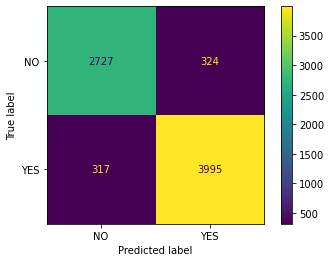

Accuracy score for SVM:  91.29


-----------Logistic Regression-----
Confusion matrix Logistic Regression:
 [[2682  369]
 [ 336 3976]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


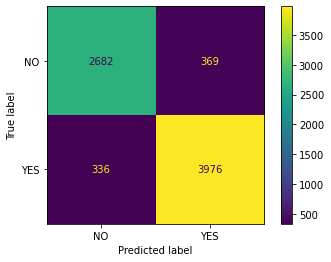

Accuracy score for Logistic regression:  90.43


--------Decision Tree------------
Confusion matrix Decision Tree:
 [[2662  389]
 [ 463 3849]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


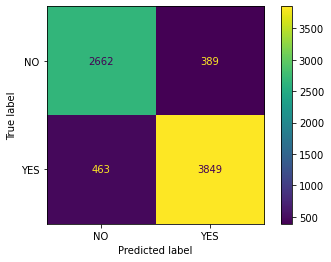

Accuracy score for  Decision Tree:  88.43





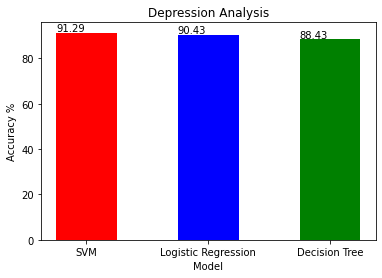

<Figure size 1080x1080 with 0 Axes>






----SVM------
Confusion matrix SVM:
 [[2727  324]
 [ 317 3995]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


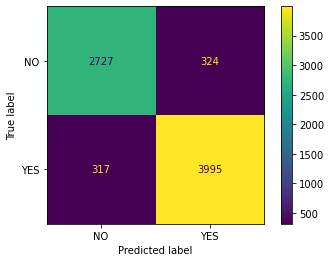

Accuracy score for SVM:  91.29


 Model accuracy:  91.29


 [[2727  324]
 [ 317 3995]]


In [ ]:


import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score     
from sklearn.metrics import plot_confusion_matrix


# to save or to load model
import joblib

svmout=0
lrout=0
dtout=0

## SVM
def train_svm(X_train, X_test, y_train, y_test):
    
    from sklearn import svm 
    svm = svm.SVC(C=1000)
    
    # training svm model
    svm.fit(X_train, y_train)
    
    print("\n\n----SVM------")
    y_pred = svm.predict(X_test)
    print("Confusion matrix SVM:\n", confusion_matrix(y_test, y_pred))

    plot_confusion_matrix(svm, X_test, y_test)  
    plt.show()

    svmout=round((accuracy_score(y_test, y_pred) * 100),2)
    # calculate the accuracy
    print("Accuracy score for SVM: ", round((accuracy_score(y_test, y_pred) * 100),2))

    return svm, svmout

    
    
## Logistic regression
def train_logistic_regression(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression 
    # Create an instance of the model. 
    logreg = LogisticRegression() 
    # Training the model. 
    logreg.fit(X_train,y_train)
    
    #Do prediction. 
    y_pred=logreg.predict(X_test)
    
    print("\n\n-----------Logistic Regression-----")
    print("Confusion matrix Logistic Regression:\n",confusion_matrix(y_test, y_pred))
    
    plot_confusion_matrix(logreg, X_test, y_test)  
    plt.show()

    lrout=round((accuracy_score(y_test, y_pred) * 100),2)
    # calculate the accuracy    
    print("Accuracy score for Logistic regression: ", round((accuracy_score(y_test, y_pred) * 100),2))
    return logreg, lrout



## Decision Tree
def train_decision_tree(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    print("\n\n--------Decision Tree------------")
    print("Confusion matrix Decision Tree:\n",confusion_matrix(y_test, y_pred))

    plot_confusion_matrix(model, X_test, y_test)  
    plt.show()

    dtout= round((accuracy_score(y_test, y_pred) * 100),2)
    print("Accuracy score for  Decision Tree: ", round((accuracy_score(y_test, y_pred) * 100),2))
    return model, dtout





# training ML Model 
# df = pd.read_csv("data//preprocessed_input_data.csv")
df = pd.read_csv(PREPROCESSED_INPUT_TRAINING_DATA)
df = df.dropna()
print(df.head())

# training the vectorizer (conveet text data to number data)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet'].values )
y = df['depressed'].values

#save vectorizer object to vectorize user tweets later
# joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(vectorizer, VECTORIZER_FILE)


# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



# checking accruacy of SVM
svm_model, svmout = train_svm(X_train, X_test, y_train, y_test)

# checking accuracy of Logistic Regression
lr_model, lrout = train_logistic_regression(X_train, X_test, y_train, y_test)

# checking accuracy of Decision Tree Algorithm
dt_model, dtout = train_decision_tree(X_train, X_test, y_train, y_test)



#PLOTING

# data = {'SVM':svmout, 'Logistic Regression':lrout, 'Decision Tree':dtout}
# courses = list(data.keys())
# values = list(data.values())

# fig = plt.figure(figsize = (10, 5))
# # creating the bar plot
# plt.bar(courses, values, color ='maroon',
# 		width = 0.4)
# plt.xlabel("Tweet")
# plt.ylabel("No. of tweets")
# plt.title("Depression Analysis")
# plt.show()

x = ['SVM', 'Logistic Regression', 'Decision Tree']
y = [svmout, lrout, dtout]
color = ['red', 'blue', 'green']
bars = plt.bar(x, height=y, color=color, width=.5)
xlocs, xlabs = plt.xticks()
# reference x so you don't need to change the range each time x changes
xlocs=[i for i in x]
xlabs=[i for i in x]
plt.xlabel('Model')
plt.ylabel('Accuracy %')
plt.xticks(xlocs, xlabs)
plt.title("Depression Analysis")

print("\n\n")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .5, yval)

plt.figure(figsize=(15, 15))
plt.show()

print("\n\n")


#  choose SVM Regression based on high accuracy score
model, accuracy_final = train_svm(X_train, X_test, y_train, y_test)


# Save the model as a pickle in a file at given location "model.pkl"
#joblib.dump(model, 'model.pkl')
joblib.dump(model, MODEL_FILE)


# Load/Read the model from the file at given location "model.pkl"
# classification_model = joblib.load('model.pkl')
classification_model = joblib.load(MODEL_FILE)

# predicting the model on test data
y_pred=classification_model.predict(X_test)

# calculate the accuracy    
print("\n\n Model accuracy: ", round((accuracy_score(y_test, y_pred) * 100), 2))

print("\n\n", confusion_matrix(y_test, y_pred))





In [ ]:
#PREDICT TWEETS
# twitter dataset scraping based on keyword

import re 
import numpy as np
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

import pandas as pd
from wordcloud import WordCloud
from better_profanity import profanity
import configparser

import joblib

def download_user_tweets():
    # set twitter credentials   
    api_key = '850YrbsNWucByH06cbS6Ao6xy'
    api_key_secret = 'lYmg13QM5MzjaN0xs0IxR12B1FvLDCLc2rnQ2cXfgScETEWWp5'
    access_token = '1580202146255220736-Nca2hdTr9quLSwjh3QIOZSEjyQ8p9a'
    access_token_secret = 'ivF4kpe9VZSy1Os68iF3mJm3TvXjHpHB2o8dYcIc1MTM9'
    
    # Access Twitter Data (login to twitter via api) 
    auth = tweepy.OAuthHandler(api_key, api_key_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    
    # read configs
    # config = configparser.ConfigParser()
    # config.read('config.ini')   
    # consumer_key = config['twitter']['api_key']
    # consumer_secret = config['twitter']['api_key_secret']   
    # access_token = config['twitter']['access_token']
    # access_token_secret = config['twitter']['access_token_secret']    
    # authentication
    # auth = tweepy.OAuthHandler(api_key, api_key_secret)
    # auth.set_access_token(access_token, access_token_secret)  
    # api = tweepy.API(auth)
    
    # user tweets
    user = input("Enter Twitter username:").strip()
    if len(user)<=1:
        user = 'elonmusk'
    limit=50
    
    tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)
    
    # tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended')
    
    # create DataFrame
    columns = ['User', 'tweet']
    data = []
    
    for tweet in tweets:
        data.append([tweet.user.screen_name, tweet.full_text])
    
    df = pd.DataFrame(data, columns=columns)
    
#     print(df.head())
#     print("\n\n")
    # save user tweets to csv
#     print("LOGGER: saving user tweets to : ", USER_TWEET_DATA_FILE)
    df.to_csv(USER_TWEET_DATA_FILE, index=False)

    return df


def predict_user_tweets(df):
    
    # user tweet preprocessing using NLP : nltk

    df['tweet'] = df['tweet'].astype(str)
    #remove leading and ending whitespaces
    df['tweet'] = df['tweet'].str.strip()

    # keep only alphabets
    df['tweet'] = df['tweet'].apply(keep_alpha)

    # nlp preprocessing to remove stopwords and get base/stem form of each word
    df['tweet'] = df['tweet'].apply(nlp_preprocessing)
    df['tweet'] = df['tweet'].str.strip()

    # replace empty rows with NAN and then drop them
    df['tweet'].replace('', np.nan, inplace=True)
    df = df.dropna()
    df = df.reset_index(drop=True)
    
    vectorizer = joblib.load(VECTORIZER_FILE)
    X_test = vectorizer.transform(df['tweet'].values )
    
    # Load/Read the model from the file at given location "model.pkl"
    # classification_model = joblib.load('model.pkl')
    classification_model = joblib.load(MODEL_FILE)
    
    # predicting the model on user test data
    y_pred=classification_model.predict(X_test)
    
#     print(y_pred)
    df['prediction'] = y_pred
    print(df[['tweet', 'prediction']])
    return list(y_pred)


def final_output(predictions):
    total = len(predictions)
    depressed_count = predictions.count("YES")
    
    print("\n\n")
    
    if depressed_count > (total*.6):
        print("Result: DEPRESSED 😒")
    else:
        print("Result: NOT DEPRESSED 😊")

user_tweets = download_user_tweets()
predictions = predict_user_tweets(user_tweets)
final_output(predictions)